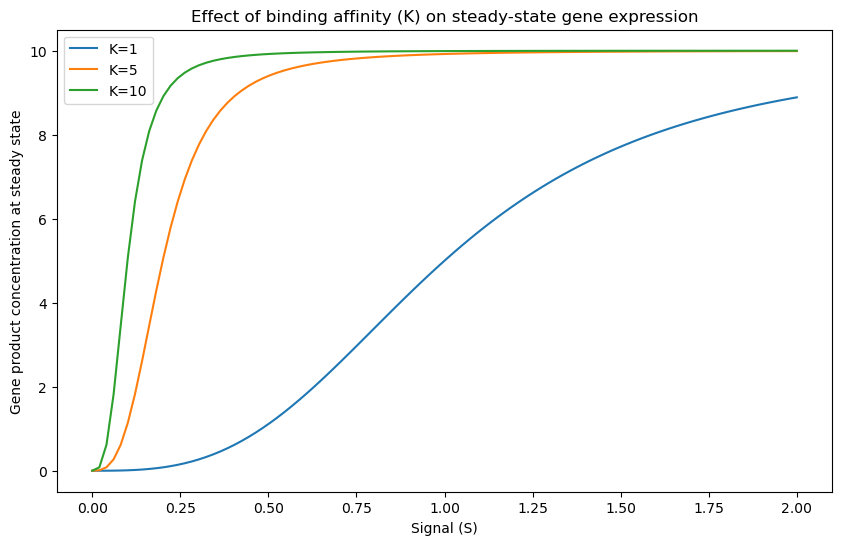

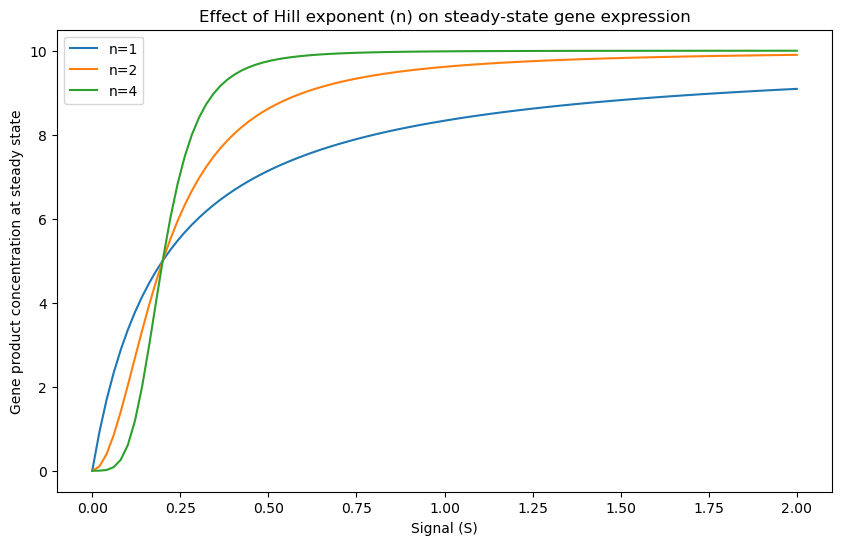

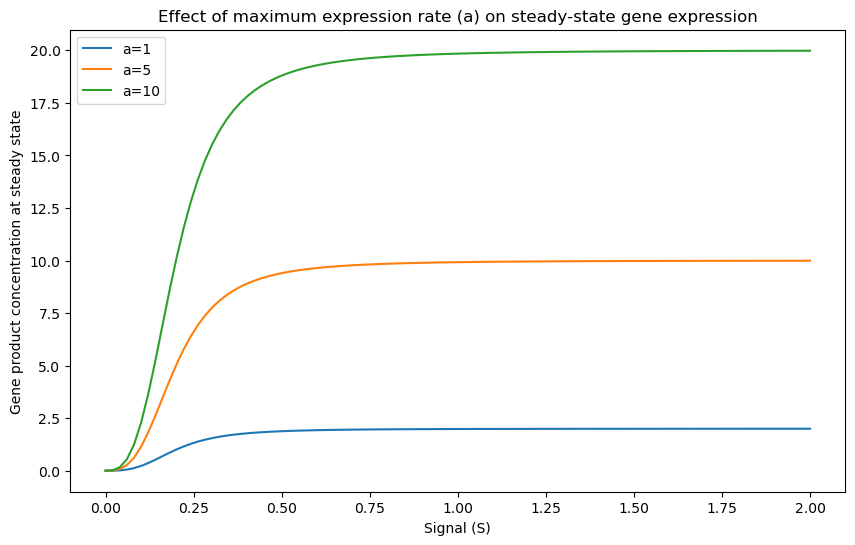

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the gene regulation function with Hill kinetics and linear degradation
def gene_regulation(y, t, S, a, K, n, d):
    """
    y: gene product (protein concentration)
    t: time
    S: signal (e.g., concentration of an activating transcription factor)
    a: maximum expression rate
    K: binding affinity
    n: Hill coefficient
    d: degradation rate
    """
    # Hill function for activation
    activation = a *( ((K*S)**n) /(1+ ((K*S)**n)) )
    
    # ODE for the gene product with linear degradation
    dydt = activation - (d * y )
    return dydt

# Function to calculate the steady-state value of y for a given signal S
def steady_state(S, a, K, n, d):
    # Simulate for long time to reach steady state
    time = np.linspace(0, 100, 1000)  # long time range
    y0 = 0.0  # initial condition
    y = odeint(gene_regulation, y0, time, args=(S, a, K, n, d))
    return y[-1]  # return the last value as steady state

# Set up signal values for steady-state analysis
S_values = np.linspace(0, 2, 100)  # Signal range

# Parameters to investigate
K_values = [1, 5, 10]  # binding affinities
n_values = [1, 2, 4]   # Hill coefficients
a_values = [1, 5, 10]  # maximum expression rates
d = 0.5  # degradation rate

# Plot the effect of signal S at steady state for different K
plt.figure(figsize=(10, 6))

for K in K_values:
    steady_states = [steady_state(S, 5, K, 3, d) for S in S_values]
    plt.plot(S_values, steady_states, label=f'K={K}')
    
plt.title('Effect of binding affinity (K) on steady-state gene expression')
plt.xlabel('Signal (S)')
plt.ylabel('Gene product concentration at steady state')
plt.legend()
plt.show()

# Plot the effect of signal S at steady state for different Hill exponent n
plt.figure(figsize=(10, 6))

for n in n_values:
    steady_states = [steady_state(S, 5, 5, n, d) for S in S_values]
    plt.plot(S_values, steady_states, label=f'n={n}')
    
plt.title('Effect of Hill exponent (n) on steady-state gene expression')
plt.xlabel('Signal (S)')
plt.ylabel('Gene product concentration at steady state')
plt.legend()
plt.show()

# Plot the effect of signal S at steady state for different maximum expression rate a
plt.figure(figsize=(10, 6))

for a in a_values:
    steady_states = [steady_state(S, a, 5, 3, d) for S in S_values]
    plt.plot(S_values, steady_states, label=f'a={a}')
    
plt.title('Effect of maximum expression rate (a) on steady-state gene expression')
plt.xlabel('Signal (S)')
plt.ylabel('Gene product concentration at steady state')
plt.legend()
plt.show()